In [1]:
!pip install roboflow --quiet
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.5 MB/s eta 0:00:00


In [2]:
# Se descarga el dataset anotado
from roboflow import Roboflow
rf = Roboflow(api_key="VLCJZFU67jgcrxUx3jxD")
project = rf.workspace("detecci-de-daos").project("car-identifier")
version = project.version(1)
dataset = version.download("yolokeras")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-identifier-1 in yolokeras:: 100%|██████████| 251/251 [00:00<00:00, 2101.69it/s]


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Cargar el modelo YOLO   soportados:  yolov5nu.pt, yolov10n.pt, yolo11n.pt, yolov8s.pt, yolov8n.pt,  etc cualquiera soportado por ultralytics
modelo = 'yolov5nu.pt'
#modelo = '/content/besttrain3.pt'
model = YOLO(modelo)

def detect_vehicles(image_path):
    try:
        results = model.predict(source=image_path, conf=0.5, verbose=False)  # Ejecutar inferencia
        for r in results:
            cars = 0
            for box in r.boxes:
              if r.names[int(box.cls)] == 'car' or r.names[int(box.cls)] == 'Carro':
                cars += 1
            return cars
    except Exception as e:
        print(f"Error al procesar la imagen {image_path}: {e}")
        return 0

# Ruta del archivo de anotaciones
file_path = '/content/Car-identifier-1/train/_annotations.txt'

# Programa para procesar las anotaciones y calcular estadísticas
def procesar_anotaciones(file_path):
    linea = 0
    total_carros_reales = 0
    total_carros_detectados = 0
    carros_detectados_correctamente = 0

    with open(file_path, 'r') as file:
        for line in file:
            linea += 1

            # Dividir la línea por espacios para obtener el nombre de la imagen y las anotaciones
            partes = line.strip().split()
            imagen = partes[0]
            imagen_path = '/content/Car-identifier-1/train/' + imagen
            numero_de_carros_reales = len(partes[1:])  # Cada anotación es una coordenada y clase

            # Hacer inferecia
            carros_inferidos = detect_vehicles(imagen_path)

            print(f"Número de carros reales: {numero_de_carros_reales} - Número de carros inferidos: {carros_inferidos}")

            # Sumar a las estadísticas
            total_carros_reales += numero_de_carros_reales
            total_carros_detectados += carros_inferidos
            carros_detectados_correctamente += min(numero_de_carros_reales, carros_inferidos)  # Detección correcta


    # Calcular las métricas de precisión y recall
    precision = carros_detectados_correctamente / total_carros_detectados if total_carros_detectados > 0 else 0
    recall = carros_detectados_correctamente / total_carros_reales if total_carros_reales > 0 else 0

    print(f"\nEstadísticas en el conjunto completo de datos para el modelo {modelo}:")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# Ejecución
procesar_anotaciones(file_path)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.31M/5.31M [00:00<00:00, 92.2MB/s]


Número de carros reales: 1 - Número de carros inferidos: 0
Número de carros reales: 3 - Número de carros inferidos: 2
Número de carros reales: 2 - Número de carros inferidos: 2
Número de carros reales: 1 - Número de carros inferidos: 0
Número de carros reales: 2 - Número de carros inferidos: 0
Número de carros reales: 0 - Número de carros inferidos: 0
Número de carros reales: 1 - Número de carros inferidos: 0
Número de carros reales: 0 - Número de carros inferidos: 0
Número de carros reales: 1 - Número de carros inferidos: 0
Número de carros reales: 2 - Número de carros inferidos: 0
Número de carros reales: 3 - Número de carros inferidos: 2
Número de carros reales: 1 - Número de carros inferidos: 0
Número de carros reales: 2 - Número de carros inferidos: 0
Número de carros reales: 2 - Número de carros inferidos: 0
Número de carros reales: 0 - Número de carros inferidos: 0
Número de carros reales: 0 - Número de carros inferidos: 0
Número de carros reales: 1 - Número de carros inferidos:

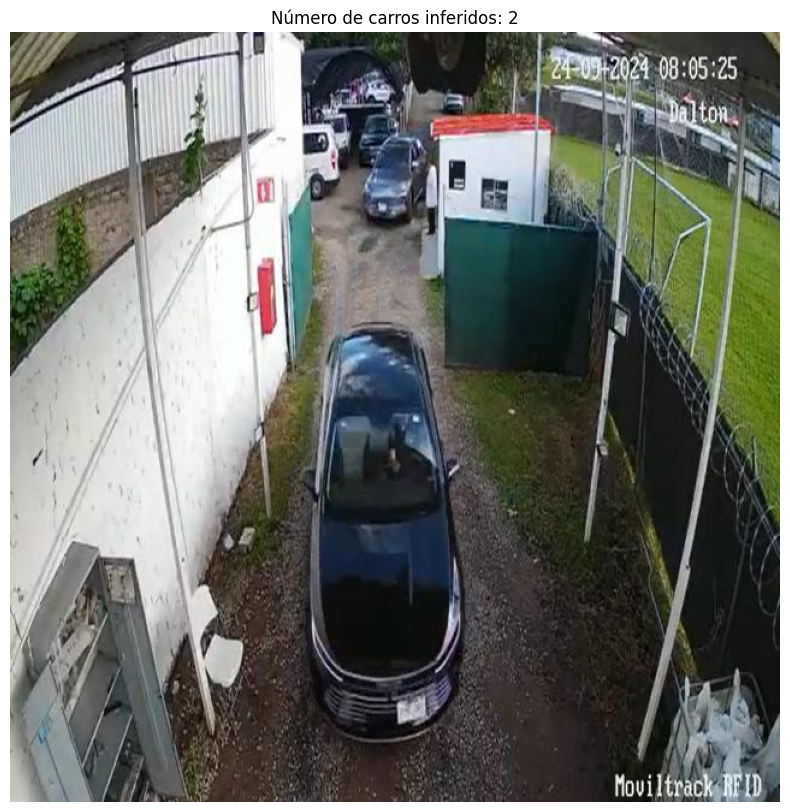

In [ ]:
def muestra(imagen_path, carros_inferidos):
      img = cv2.imread(imagen_path)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.figure(figsize=(10, 10))
      plt.imshow(img_rgb)
      plt.title(f"Número de carros inferidos: {carros_inferidos}")
      plt.axis('off')
      plt.show()

archivo_de_prueba='/content/Car-identifier-1/train/Screenshot-2024-10-18-213044_png.rf.00cd561650b5ab3c4b1100459bfa7412.jpg'
muestra(archivo_de_prueba, detect_vehicles(archivo_de_prueba))

Estadísticas en el conjunto completo de datos para el modelo yolov5n.pt:
Precisión: 0.9570
Recall: 0.2681

Estadísticas en el conjunto completo de datos para el modelo yolov8n.pt:
Precisión: 0.9677
Recall: 0.2711

Estadísticas en el conjunto completo de datos para el modelo yolov10n.pt:
Precisión: 0.9700
Recall: 0.2922

Estadísticas en el conjunto completo de datos para el modelo yolo11n.pt:
Precisión: 0.9504
Recall: 0.3464

Estadísticas en el conjunto completo de datos para el modelo /content/besttrain3.pt:
Precisión: 0.9822
Recall: 1.0000



entrenado del 9n
image 1/1 /content/Car-identifier-1/train/Screenshot-2024-10-18-210814_png.rf.006d4564a6b02163f70b1cac7db0f88d.jpg: 640x640 1 Carro, 2404.3ms
Speed: 2.8ms preprocess, 2404.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Número de carros reales: 1 - Número de carros inferidos: 1

11n
image 1/1 /content/Car-identifier-1/train/Screenshot-2024-10-18-210814_png.rf.006d4564a6b02163f70b1cac7db0f88d.jpg: 640x640 (no detections), 304.3ms
Speed: 4.2ms preprocess, 304.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Número de carros reales: 1 - Número de carros inferidos: 0

5n
image 1/1 /content/Car-identifier-1/train/Screenshot-2024-10-18-210814_png.rf.006d4564a6b02163f70b1cac7db0f88d.jpg: 640x640 (no detections), 484.0ms
Speed: 5.7ms preprocess, 484.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Número de carros reales: 1 - Número de carros inferidos: 0

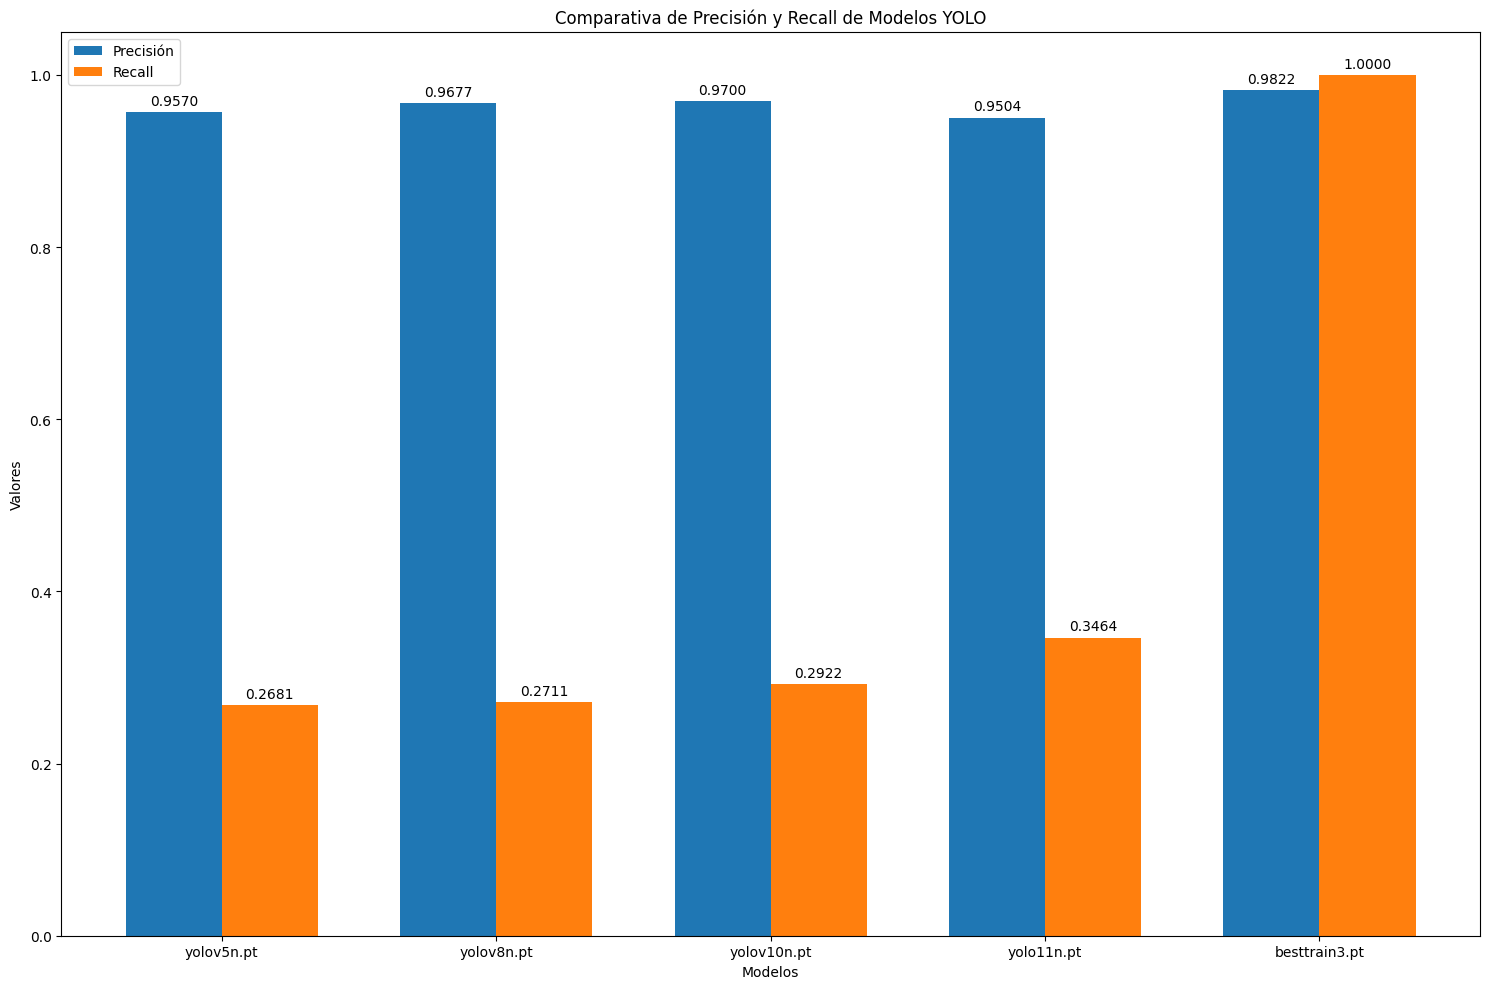

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos de desempeño
datos = {
    'Modelo': ['yolov5n.pt', 'yolov8n.pt', 'yolov10n.pt', 'yolo11n.pt', 'besttrain3.pt'],
    'Precisión': [0.9570, 0.9677, 0.9700, 0.9504, 0.9822],
    'Recall': [0.2681, 0.2711, 0.2922, 0.3464, 1.0000]
}

# Crear DataFrame
df = pd.DataFrame(datos)

# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(15, 10))

# Posición de las barras
bar_width = 0.35
index = np.arange(len(df['Modelo']))

# Crear barras para Precisión y Recall
bar1 = ax.bar(index, df['Precisión'], bar_width, label='Precisión')
bar2 = ax.bar(index + bar_width, df['Recall'], bar_width, label='Recall')

# Etiquetas y título
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparativa de Precisión y Recall de Modelos YOLO')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Modelo'])
ax.legend()

# Añadir etiquetas de valor encima de las barras
def agregar_etiquetas(barras):
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.4f}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

agregar_etiquetas(bar1)
agregar_etiquetas(bar2)

plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [10]:
df

,Modelo,Precisión,Recall
0,yolov5n.pt,0.9570,0.2681
1,yolov8n.pt,0.9677,0.2711
2,yolov10n.pt,0.9700,0.2922
3,yolo11n.pt,0.9504,0.3464
4,besttrain3.pt,0.9822,1.0000


In [11]:
df.to_excel('df.xlsx', index=False)
